In [1]:
!pip install -q -U watermark


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install -q missingno


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [5]:
%reload_ext watermark
%watermark -a "Juliana Santimaria"

Author: Juliana Santimaria



In [6]:
df_mod = pd.read_csv("dataset.csv")

In [7]:
type(df_mod)

pandas.core.frame.DataFrame

In [8]:
df_mod.shape

(500, 5)

In [9]:
df_mod.columns

Index(['Idade', 'Salario', 'Genero', 'Escolaridade',
       'Score_Exame_Psicotecnico'],
      dtype='object')

In [10]:
df_mod.head()

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico
0,58,30404.959339,Masculino,Médio,56.0
1,48,20886.502401,Feminino,Médio,NaN
2,34,15959.388748,Masculino,Médio,57.0
3,62,28534.995327,Outro,Superior,68.0
4,27,10553.176215,Outro,Fundamental,44.0


In [11]:
df_mod.sample(10)

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico
344,42,NaN,Feminino,Médio,43.0
150,34,8483.087803,Outro,Médio,66.0
422,47,24555.087336,Feminino,Médio,59.0
77,40,17993.897641,Masculino,Médio,41.0
300,27,17651.679083,Feminino,Fundamental,44.0
313,27,8889.173379,Outro,Fundamental,29.0
463,49,17741.576972,Feminino,Médio,77.0
295,23,22853.464289,Masculino,Superior,100.0
452,49,15295.628843,Feminino,Superior,67.0
61,61,29432.764241,Feminino,Superior,67.0


In [12]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Idade                     500 non-null    int64  
 1   Salario                   450 non-null    float64
 2   Genero                    500 non-null    object 
 3   Escolaridade              500 non-null    object 
 4   Score_Exame_Psicotecnico  470 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 19.7+ KB


In [13]:
df_mod.describe(include = object)

,Genero,Escolaridade
count,500,500
unique,3,3
top,Feminino,Médio
freq,169,274


In [14]:
df_mod.describe()

,Idade,Salario,Score_Exame_Psicotecnico
count,500.000000,450.000000,470.000000
mean,42.848000,21252.781137,61.565957
std,13.189725,8322.933018,17.662523
min,20.000000,-3254.849042,20.000000
25%,31.750000,15139.019963,48.000000
50%,44.000000,21681.102602,61.000000
75%,54.000000,27379.540314,74.000000
max,65.000000,40845.107626,100.000000


In [15]:
df_mod.head()

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico
0,58,30404.959339,Masculino,Médio,56.0
1,48,20886.502401,Feminino,Médio,NaN
2,34,15959.388748,Masculino,Médio,57.0
3,62,28534.995327,Outro,Superior,68.0
4,27,10553.176215,Outro,Fundamental,44.0


In [16]:
columns_select = [list(df_mod.columns.values)[i] for i in [0, 1, 4]]

In [17]:
columns_select

['Idade', 'Salario', 'Score_Exame_Psicotecnico']

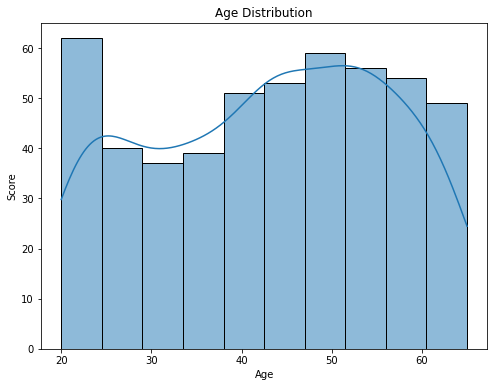

In [18]:
plt.figure(figsize = (8, 6))
sns.histplot(df_mod['Idade'], kde = True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Score')
plt.show()

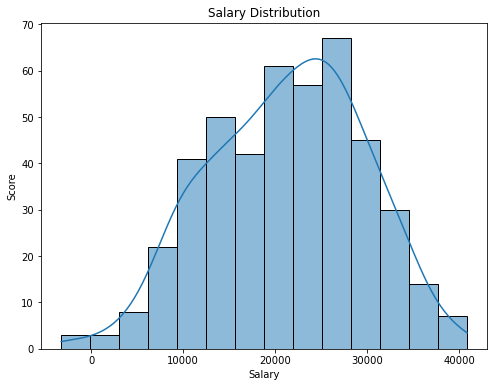

In [19]:
plt.figure(figsize = (8, 6))
sns.histplot(df_mod['Salario'], kde = True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Score')
plt.show()

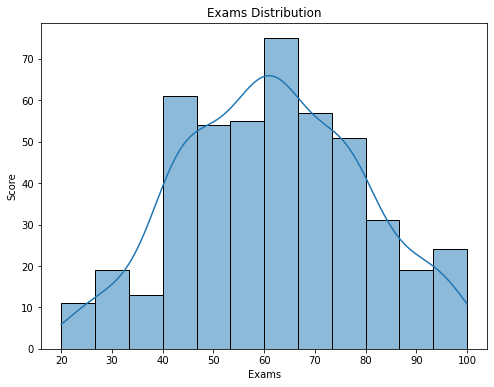

In [20]:
plt.figure(figsize = (8, 6))
sns.histplot(df_mod['Score_Exame_Psicotecnico'], kde = True)
plt.title('Exams Distribution')
plt.xlabel('Exams')
plt.ylabel('Score')
plt.show()

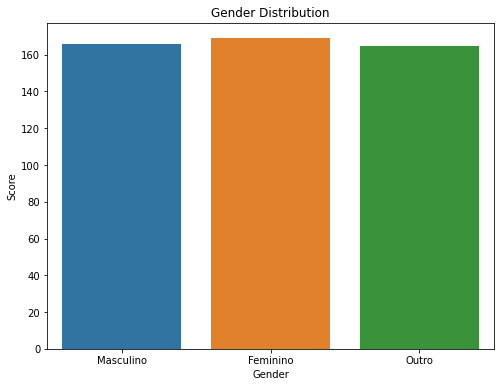

In [21]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df_mod, x = 'Genero')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Score')
plt.show()

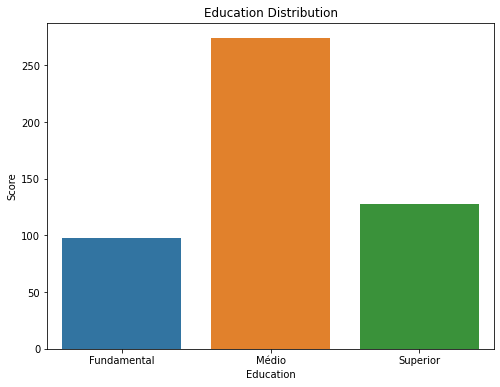

In [22]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df_mod, x = 'Escolaridade', order = ['Fundamental', 'Médio', 'Superior'])
plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Score')
plt.show()

In [23]:
#analysis of quantitative variables

In [24]:
correlation_matrix = df_mod[['Idade', 'Salario', 'Score_Exame_Psicotecnico']].corr()

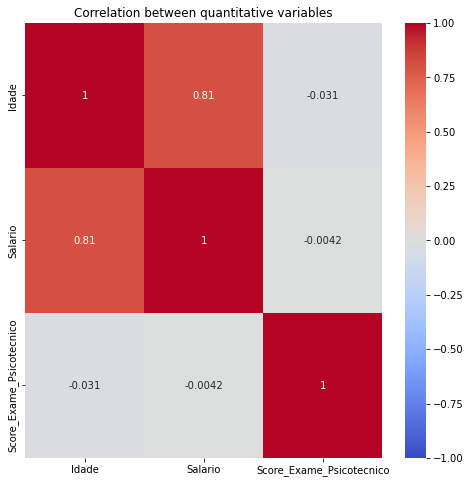

In [25]:
plt.figure(figsize = (8, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Correlation between quantitative variables')
plt.show()

In [26]:
#analysis of qualitative variables

In [27]:
table_contingency = pd.crosstab(df_mod['Genero'], df_mod['Escolaridade'])

In [28]:
print(table_contingency)

Escolaridade  Fundamental  Médio  Superior
Genero                                    
Feminino               31     90        48
Masculino              32     95        39
Outro                  35     89        41


In [29]:
from scipy.stats import chi2_contingency

In [30]:
chi2, p, _, _ = chi2_contingency(table_contingency)

In [31]:
print(f'Test Value-p Chi-square: {p:.4f}')

Test Value-p Chi-square: 0.8300


In [32]:
n = table_contingency.sum().sum()
phi2 = chi2 / n
r, k = table_contingency.shape
cramers_v = np.sqrt(phi2 / min(r-1, k-1))
print(f'Cramér V coefficient: {cramers_v:.4f}')

Cramér V coefficient: 0.0385


In [33]:
df_mod.head()

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico
0,58,30404.959339,Masculino,Médio,56.0
1,48,20886.502401,Feminino,Médio,NaN
2,34,15959.388748,Masculino,Médio,57.0
3,62,28534.995327,Outro,Superior,68.0
4,27,10553.176215,Outro,Fundamental,44.0


In [34]:
duplicate = df_mod.duplicated()

In [35]:
df_mod[duplicate]

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico


In [36]:
df_mod[df_mod['Salario'] < 0]

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico
94,20,-619.478622,Masculino,Médio,58.0
358,21,-2984.433215,Masculino,Médio,43.0
380,20,-3254.849042,Outro,Médio,50.0


In [37]:
df_mod['Salario'] = df_mod['Salario'].apply(lambda x: x if x >= 0 else None)

In [38]:
df_mod[df_mod['Salario'] < 0]

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico


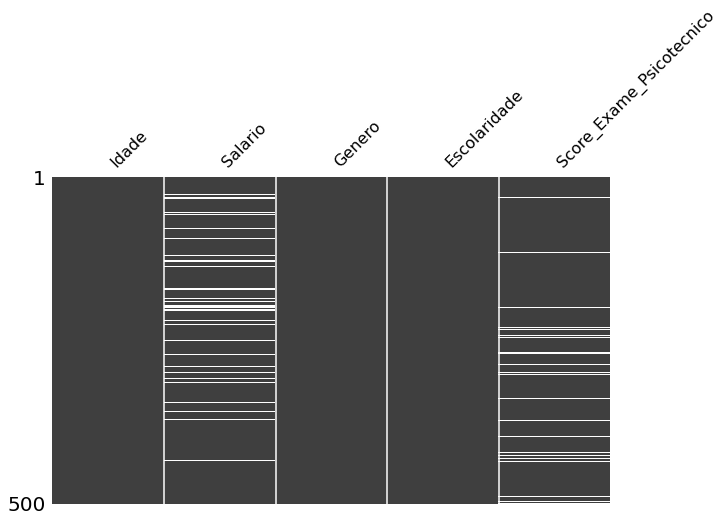

In [39]:
msno.matrix(df_mod, figsize = (10, 6), sparkline = False)
plt.show()

In [40]:
value_null = df_mod.isna().sum()

In [41]:
print(value_null)

Idade                        0
Salario                     53
Genero                       0
Escolaridade                 0
Score_Exame_Psicotecnico    30
dtype: int64


In [42]:
percentage_null = (df_mod.isna().mean() * 100).round(2)

In [43]:
print(percentage_null)

Idade                        0.0
Salario                     10.6
Genero                       0.0
Escolaridade                 0.0
Score_Exame_Psicotecnico     6.0
dtype: float64


In [44]:
from scipy import stats

salary = df_mod['Salario']
stat, p_valor = stats.shapiro(salary)

print(f'Test Statistics: {stat}')
print(f'Value-p: {p_valor}')

alfa = 0.05 #level of significance
if p_valor > alfa:
    print('There is no evidence to reject the null hypothesis (the data appears to follow a normal distribution).')
else:
    print('The null hypothesis is rejected (the data doesn´t follow a normal distribution).')



Test Statistics: nan
Value-p: 1.0
There is no evidence to reject the null hypothesis (the data appears to follow a normal distribution).


In [45]:
salary_mean = df_mod['Salario'].mean()

In [46]:
df_mod['Salario'].fillna(salary_mean, inplace = True)

In [47]:
value_null = df_mod.isna().sum()
print(value_null)

Idade                        0
Salario                      0
Genero                       0
Escolaridade                 0
Score_Exame_Psicotecnico    30
dtype: int64


In [48]:
from scipy import stats

score_exame = df_mod['Score_Exame_Psicotecnico']
stat, p_valor = stats.shapiro(score_exame)

print(f'Test Statistics: {stat}')
print(f'Value-p: {p_valor}')

alfa = 0.05 #level of significance
if p_valor > alfa:
    print('There is no evidence to reject the null hypothesis (the data appears to follow a normal distribution).')
else:
    print('The null hypothesis is rejected (the data doesn´t follow a normal distribution).')


Test Statistics: nan
Value-p: 1.0
There is no evidence to reject the null hypothesis (the data appears to follow a normal distribution).


In [49]:
exame_mean = df_mod['Score_Exame_Psicotecnico'].mean()

In [50]:
df_mod['Score_Exame_Psicotecnico'].fillna(exame_mean, inplace = True)

In [51]:
value_null = df_mod.isna().sum()
print(value_null)

Idade                       0
Salario                     0
Genero                      0
Escolaridade                0
Score_Exame_Psicotecnico    0
dtype: int64


In [52]:
df_mod.head()

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico
0,58,30404.959339,Masculino,Médio,56.000000
1,48,20886.502401,Feminino,Médio,61.565957
2,34,15959.388748,Masculino,Médio,57.000000
3,62,28534.995327,Outro,Superior,68.000000
4,27,10553.176215,Outro,Fundamental,44.000000


In [53]:
age_group = [0, 23, 35, 45, 55, float('inf')]

In [54]:
name_group = ['Menos de 25', '25-34', '35-44', '45-54', '55 ou mais']

In [56]:
df_mod['age_group'] = pd.cut(df_mod['Idade'], bins = age_group, labels = name_group)

In [57]:
df_mod.head()

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico,age_group
0,58,30404.959339,Masculino,Médio,56.000000,55 ou mais
1,48,20886.502401,Feminino,Médio,61.565957,45-54
2,34,15959.388748,Masculino,Médio,57.000000,25-34
3,62,28534.995327,Outro,Superior,68.000000,55 ou mais
4,27,10553.176215,Outro,Fundamental,44.000000,25-34


In [58]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Idade                     500 non-null    int64   
 1   Salario                   500 non-null    float64 
 2   Genero                    500 non-null    object  
 3   Escolaridade              500 non-null    object  
 4   Score_Exame_Psicotecnico  500 non-null    float64 
 5   age_group                 500 non-null    category
dtypes: category(1), float64(2), int64(1), object(2)
memory usage: 20.4+ KB


In [59]:
df_mod.drop('Idade', axis = 1, inplace = True)

In [60]:
df_mod.head()

,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico,age_group
0,30404.959339,Masculino,Médio,56.000000,55 ou mais
1,20886.502401,Feminino,Médio,61.565957,45-54
2,15959.388748,Masculino,Médio,57.000000,25-34
3,28534.995327,Outro,Superior,68.000000,55 ou mais
4,10553.176215,Outro,Fundamental,44.000000,25-34


In [62]:
df_mod['Salario'] = df_mod['Salario'].round().astype(int)
df_mod['Score_Exame_Psicotecnico'] = df_mod['Score_Exame_Psicotecnico'].round().astype(int)

In [63]:
df_mod.head()

,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico,age_group
0,30405,Masculino,Médio,56,55 ou mais
1,20887,Feminino,Médio,62,45-54
2,15959,Masculino,Médio,57,25-34
3,28535,Outro,Superior,68,55 ou mais
4,10553,Outro,Fundamental,44,25-34


In [64]:
df_mod.describe()

,Salario,Score_Exame_Psicotecnico
count,500.00000,500.000000
mean,21410.79200,61.592000
std,7679.06567,17.123667
min,642.00000,20.000000
25%,15888.75000,49.000000
50%,21411.00000,62.000000
75%,26729.00000,73.250000
max,40845.00000,100.000000


In [66]:
average_salary_by_age_group = df_mod.groupby('age_group')['Salario'].mean()

In [67]:
average_salary_by_age_group.head()

age_group
Menos de 25    12981.588235
25-34          14675.080357
35-44          20980.654545
45-54          24736.491935
55 ou mais     29364.359223
Name: Salario, dtype: float64

In [68]:
median_salary_by_age_group = df_mod.groupby('age_group')['Salario'].mean()
median_salary_by_age_group.head()

age_group
Menos de 25    12981.588235
25-34          14675.080357
35-44          20980.654545
45-54          24736.491935
55 ou mais     29364.359223
Name: Salario, dtype: float64

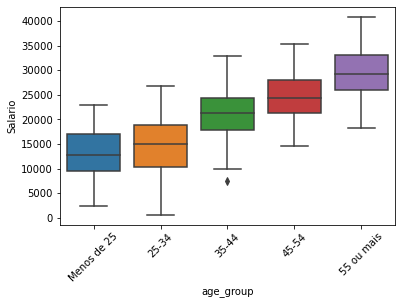

In [69]:
sns.boxplot(x = 'age_group', y = 'Salario', data = df_mod)
plt.xticks(rotation = 45)
plt.show()

In [70]:
import scipy.stats as stats

results_news = stats.f_oneway(*[group['Salario'] for name, group in df_mod.groupby('age_group')])

if results_news.pvalue < 0.05:
    print("There is evidence of significant differences in average salaries between age groups.")
else:
    print("There is no evidence of significant differences in average salaries between age groups.")

There is evidence of significant differences in average salaries between age groups.
